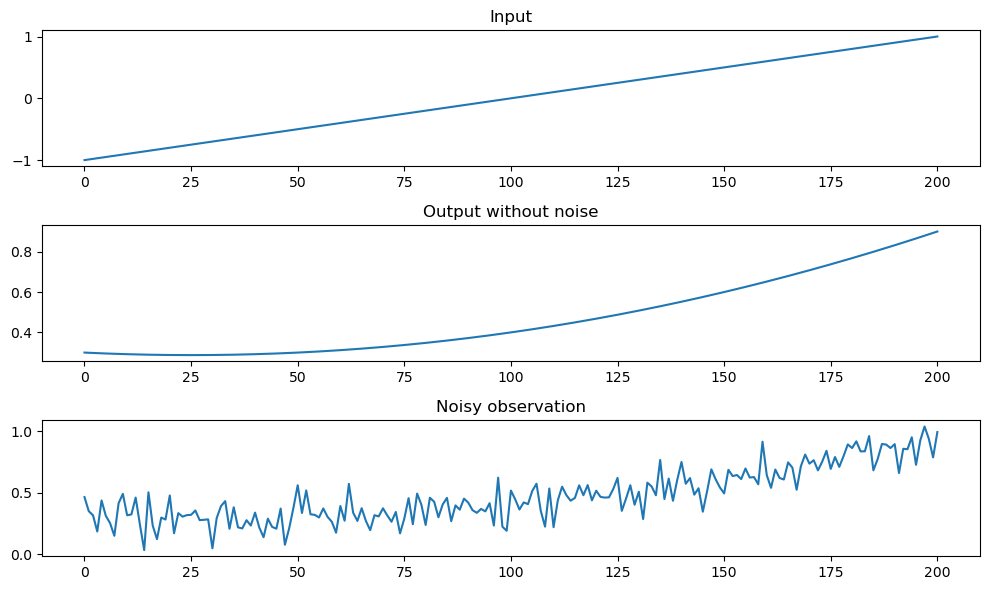

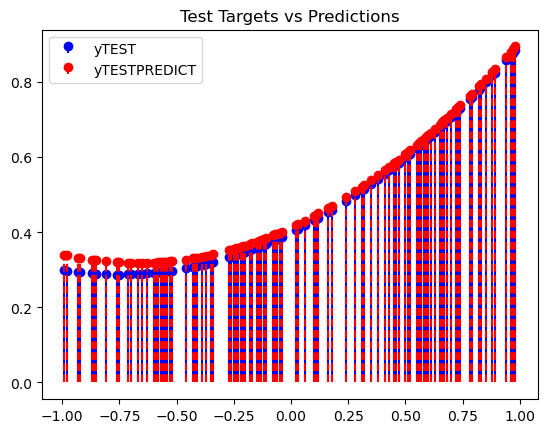

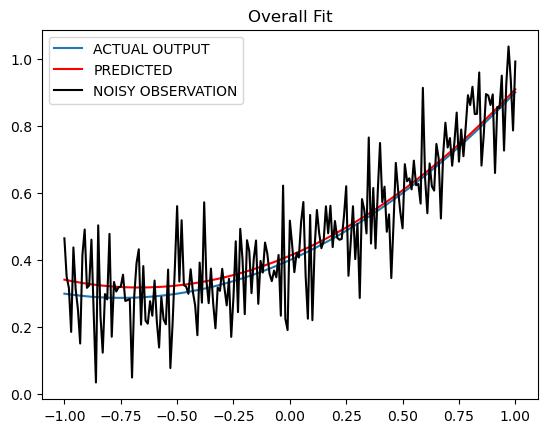

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generation of data
x = np.arange(-1, 1.01, 0.01)  # Creating Input variable
y = 0.2 * x**2 + 0.3 * x + 0.4
t = y + np.random.randn(len(x)) * 0.1  # noisy target output that is generated using y, that is observed in real life

# Plotting of input, noiseless output, noisy target
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(x)
plt.title("Input")

plt.subplot(3, 1, 2)
plt.plot(y)
plt.title("Output without noise")

plt.subplot(3, 1, 3)
plt.plot(t)
plt.title("Noisy observation")
plt.tight_layout()
plt.savefig("figure 1_pollin.png")

# Random splitting of dataset into traning and testing
L = len(x)
indices = np.random.permutation(L)
TRAINPOS = indices[:L // 2]
TESTPOS = indices[L // 2:]

xTRAIN = x[TRAINPOS]
tTRAIN = t[TRAINPOS]
xTEST = x[TESTPOS]
yTEST = y[TESTPOS]

# Construction of the polynomial model(PHI(design) matrix) for degree-2 polynomial to illustrate
PHI = np.vstack((np.ones_like(xTRAIN), xTRAIN, xTRAIN**2)).T 

# Least squares solution 
w = np.linalg.pinv(PHI.T @ PHI) @ PHI.T @ tTRAIN

# Prediction on testing data
yTESTPREDICT = w[0] + w[1] * xTEST + w[2] * xTEST**2

# Plotting test predictions vs. true
plt.figure()
plt.stem(xTEST, yTEST, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.stem(xTEST, yTESTPREDICT, linefmt='r--', markerfmt='ro', basefmt=' ')
plt.legend(['yTEST', 'yTESTPREDICT'])
plt.title("Test Targets vs Predictions")
plt.savefig("figure 2_pollin.png")

# Predicting on complete dataset
yPREDICT = w[0] + w[1] * x + w[2] * x**2

# Overall Analysis
plt.figure()
plt.plot(x, y, label='ACTUAL OUTPUT')
plt.plot(x, yPREDICT, 'r', label='PREDICTED')
plt.plot(x, t, 'k', label='NOISY OBSERVATION')
plt.legend()
plt.title("Overall Fit")
plt.savefig("figure 3_pollin.png")